In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
train_data=data[:1000]
train_target=target[:1000]

test_data=data[1000:]
test_target=target[1000:]

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(1000, 50, 1)
(209, 50, 1)
(1000, 1)
(209, 1)


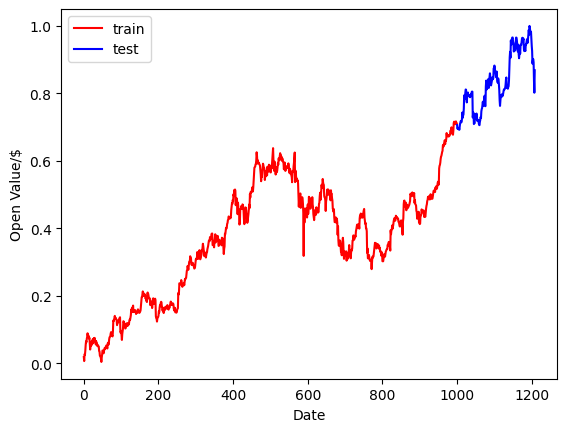

In [3]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta

def build_model(parameters):
    
    model = Sequential()
    
    for i in range(parameters.Int('num_layers', 2, 20)):

        if(i==0):
            model.add(LSTM(units=parameters.Int('#LSTM CELL layer' + str(i),min_value=76,max_value=106,step=10),
                            activation=parameters.Choice('activation_function '+str(i),['relu','sigmoid','tanh']),return_sequences=True,input_shape=(50,1)))
            
            model.add(Dropout(parameters.Choice('drop_prob 1',[0.2,0.3,0.4,0.5])))
        
        else:
            model.add(LSTM(units=parameters.Int('#LSTM CELL layer' + str(i),min_value=72,max_value=120,step=8),return_sequences=True,
                                   activation=parameters.Choice('activation_function '+str(i),['relu','sigmoid','tanh'])))
            
            model.add(Dropout(parameters.Choice('drop_prob 2',[0.2,0.3,0.4,0.5])))
            
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer=parameters.Choice('optmz', ['adam', 'adaDelta', 'adaGrad']),loss=parameters.Choice('loss f', ['mse', 'mae']))
    #model.compile(optimizer=Adam(parameters.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mse')
    
    return model

In [10]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(build_model,objective='val_loss',max_trials=5,executions_per_trial=3,directory='project',
                     project_name='LSTM - ModelTune')

c:\Users\USER\Music\DeepL\myenvdeep\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
tuner.search_space_summary()

Search space summary
Default search space size: 9
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
#LSTM CELL layer0 (Int)
{'default': None, 'conditions': [], 'min_value': 76, 'max_value': 106, 'step': 10, 'sampling': 'linear'}
activation_function 0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
drop_prob 1 (Choice)
{'default': 0.2, 'conditions': [], 'values': [0.2, 0.3, 0.4, 0.5], 'ordered': True}
#LSTM CELL layer1 (Int)
{'default': None, 'conditions': [], 'min_value': 72, 'max_value': 120, 'step': 8, 'sampling': 'linear'}
activation_function 1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
drop_prob 2 (Choice)
{'default': 0.2, 'conditions': [], 'values': [0.2, 0.3, 0.4, 0.5], 'ordered': True}
optmz (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'adaDelta', 'adaGrad'], 'ordered': False

In [12]:
tuner.search(train_data,train_target,epochs=10,validation_data=(test_data, test_target))

Trial 5 Complete [00h 03m 23s]
val_loss: 0.2193949818611145

Best val_loss So Far: 0.022108657906452816
Total elapsed time: 00h 14m 20s


In [13]:
tuner.results_summary()

Results summary
Results in project\LSTM - ModelTune
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0 summary
Hyperparameters:
num_layers: 3
#LSTM CELL layer0: 106
activation_function 0: tanh
drop_prob 1: 0.3
#LSTM CELL layer1: 72
activation_function 1: relu
drop_prob 2: 0.3
optmz: adam
loss f: mse
#LSTM CELL layer2: 72
activation_function 2: relu
Score: 0.022108657906452816

Trial 4 summary
Hyperparameters:
num_layers: 13
#LSTM CELL layer0: 86
activation_function 0: sigmoid
drop_prob 1: 0.5
#LSTM CELL layer1: 96
activation_function 1: relu
drop_prob 2: 0.2
optmz: adam
loss f: mse
#LSTM CELL layer2: 112
activation_function 2: relu
#LSTM CELL layer3: 104
activation_function 3: sigmoid
#LSTM CELL layer4: 120
activation_function 4: relu
#LSTM CELL layer5: 80
activation_function 5: tanh
#LSTM CELL layer6: 120
activation_function 6: tanh
#LSTM CELL layer7: 88
activation_function 7: tanh
#LSTM CELL layer8: 104
activation_function 8: sigmoid
#LSTM CELL layer9: 104
ac

In [16]:
best_models = tuner.get_best_models()
print(best_models[0].summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 106)        │        45,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 106)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50, 72)         │        51,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 72)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50, 72)         │        41,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 72)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50, 1)          │            73 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,177 (543.66 KB)

 Trainable params: 139,177 (543.66 KB)

 Non-trainable params: 0 (0.00 B)

None
